<a href="https://colab.research.google.com/github/jyotirangu/DataScience/blob/main/12_Pandas/3_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

### `Q-1:` Write a program to create an empty series.

In [24]:
pd.Series()

Series([], dtype: object)

### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [25]:
a = pd.Series([2,3,4,5,6,7])
b = pd.Series([1,2,3,4,5,6])

print(a)
print(b)
print(a+b)
print(a-b)
print(a*b)
print(a/b)

0    2
1    3
2    4
3    5
4    6
5    7
dtype: int64
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
0     3
1     5
2     7
3     9
4    11
5    13
dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64
0     2
1     6
2    12
3    20
4    30
5    42
dtype: int64
0    2.000000
1    1.500000
2    1.333333
3    1.250000
4    1.200000
5    1.166667
dtype: float64


### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [26]:
a = pd.Series([2, 4, 6, 8, 10])
b = pd.Series([1, 3, 5, 7, 10])

print(a)
print(b)
print(a==b)
print(a<b)
print(a>b)

0     2
1     4
2     6
3     8
4    10
dtype: int64
0     1
1     3
2     5
3     7
4    10
dtype: int64
0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


### `Q-4.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [27]:
def change_dtype(series):
  return pd.to_numeric(series, errors = 'coerce')

series = pd.Series([1,2,'Python',2.0,True,100])
change_dtype(series)


0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

In [28]:
match = pd.read_csv('3batsman_runs_series.csv')
match.head(5)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


### `Q-5` Find top 10 most run getter from the series.

In [29]:
match.sort_values(by = 'batsman_run', ascending = False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


### `Q-6` No of players having runs above 3000

In [30]:
match[match['batsman_run'] > 3000].shape[0]

20

### `Q-7` No of players having runs above mean value?

In [31]:
run_mean = match['batsman_run'].mean()
match[match['batsman_run'] > run_mean].shape[0]

128

In [32]:
item_data = pd.read_csv('3items.csv')
item_data.head(5)

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98


### `Q-8`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    iii. Item price is given in $, so convert it to rupees without currency symbol.
    iv. Make data type of newly made series as float.
    v. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [33]:
# i. Read `items.csv` making `item_name` as index.
item_data = pd.read_csv('3items.csv', index_col = ['item_name']).squeeze('columns')
item_data

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [34]:
# ii. Show no of nan values

item_data.isna().sum()

np.int64(50)

In [35]:
# iii. Item price is given in $, so convert it to rupees without currency symbol.

def rupees(x):
  try:
    y = x[1:]
  except:
    y = x
  return float(y)*82.49


item_data.apply(rupees)

item_name
Chips and Fresh Tomato Salsa              197.1511
Izze                                      279.6411
Nantucket Nectar                          279.6411
Chips and Tomatillo-Green Chili Salsa     197.1511
Chicken Bowl                             1400.6802
                                           ...    
Steak Burrito                             969.2575
Steak Burrito                             969.2575
Chicken Salad Bowl                        928.0125
Chicken Salad Bowl                        721.7875
Chicken Salad Bowl                        721.7875
Name: item_price, Length: 4622, dtype: float64

In [36]:
# iv. Make data type of newly made series as float.
item_data = item_data.apply(rupees)


In [37]:
# v. Fill nan with mean of the series
item_data.fillna(item_data.mean())

item_name
Chips and Fresh Tomato Salsa              197.1511
Izze                                      279.6411
Nantucket Nectar                          279.6411
Chips and Tomatillo-Green Chili Salsa     197.1511
Chicken Bowl                             1400.6802
                                           ...    
Steak Burrito                             969.2575
Steak Burrito                             969.2575
Chicken Salad Bowl                        928.0125
Chicken Salad Bowl                        721.7875
Chicken Salad Bowl                        721.7875
Name: item_price, Length: 4622, dtype: float64

### `Q-9`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [38]:
# i. Find mean price
item_data.mean()

np.float64(615.6254681102363)

In [39]:
# ii. Find 30th and 6th percentile value
item_data.quantile(q=0.3)
item_data.quantile(q=0.6)

np.float64(721.7874999999999)

<Axes: ylabel='Frequency'>

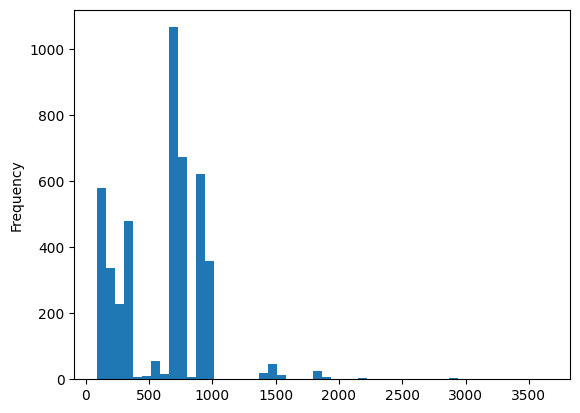

In [40]:
# iii. Plot Histogram on price with bin size 50
item_data.plot.hist(bins = 50)

In [41]:
# iv. No of items price lies between [1000 to 2000]
item_data[(item_data > 1000) & (item_data < 2000)]

item_name
Chicken Bowl           1400.6802
Chicken Salad Bowl     1856.0250
Steak Burrito          1483.1702
Chicken Burrito        1443.5750
Chicken Bowl           1443.5750
                         ...    
Chicken Bowl           1856.0250
Steak Bowl             1938.5150
Chicken Bowl           1443.5750
Chips and Guacamole    1468.3220
Chicken Salad Bowl     1443.5750
Name: item_price, Length: 116, dtype: float64